[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Example 6.19

Analysis of data from a poll carried out in Pennsylvania before the 2020 US election. The poll reports that 281 people intend to vote for Trump and 300 for Biden.\
Topics: Bayesian parametric modeling, beta distribution, prior and posterior distributions

Author: Carlos Fernandez-Granda

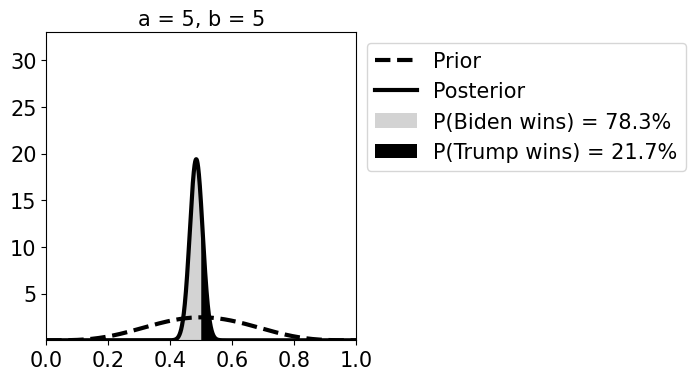

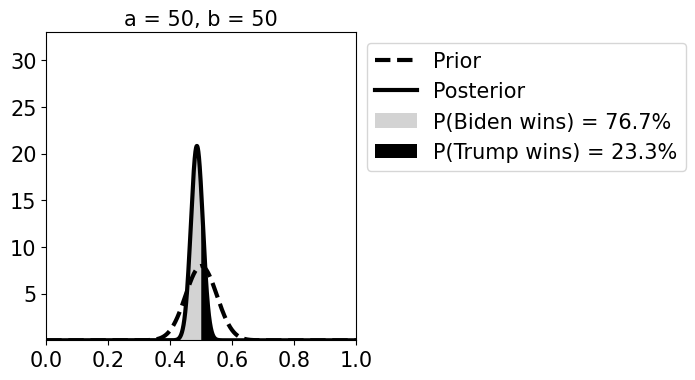

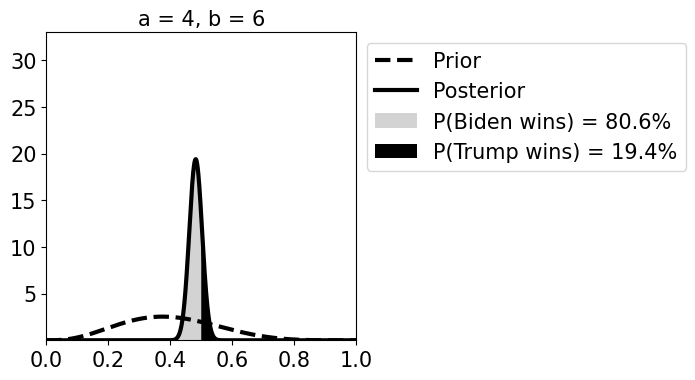

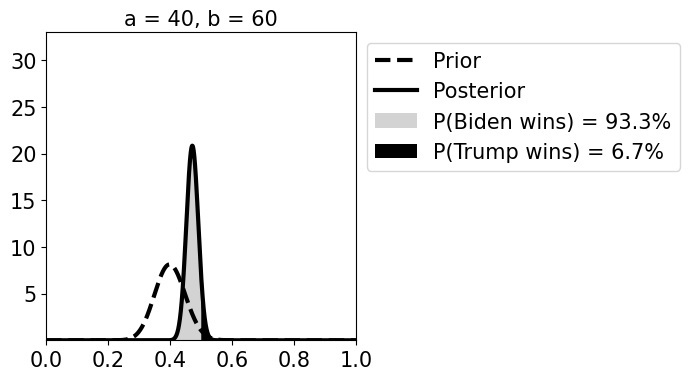

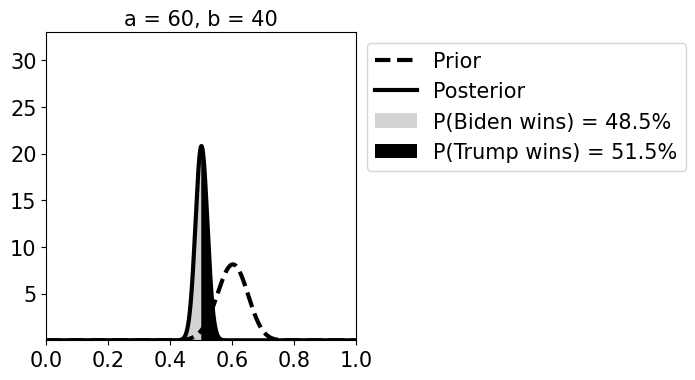

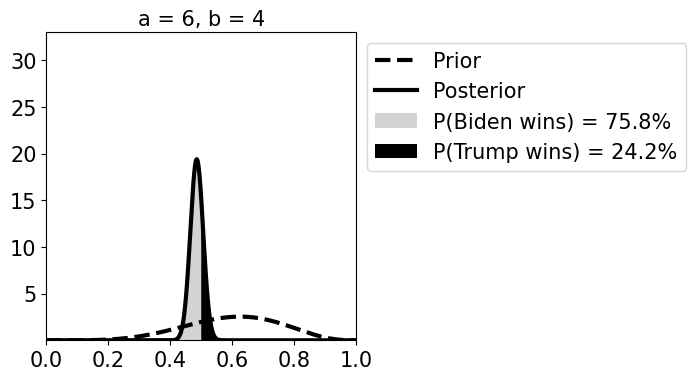

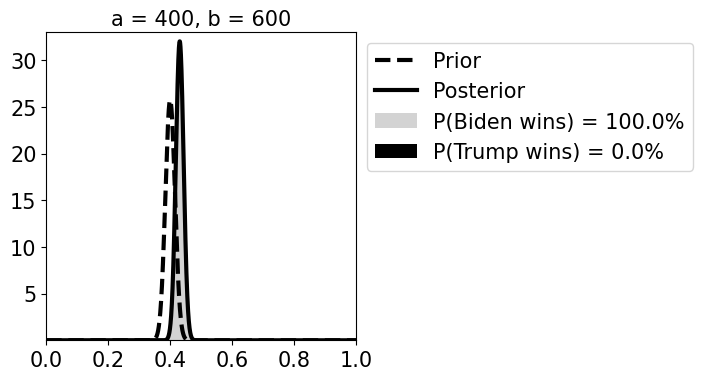

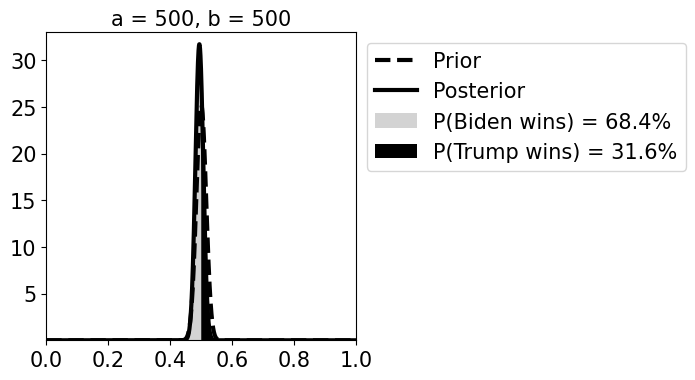

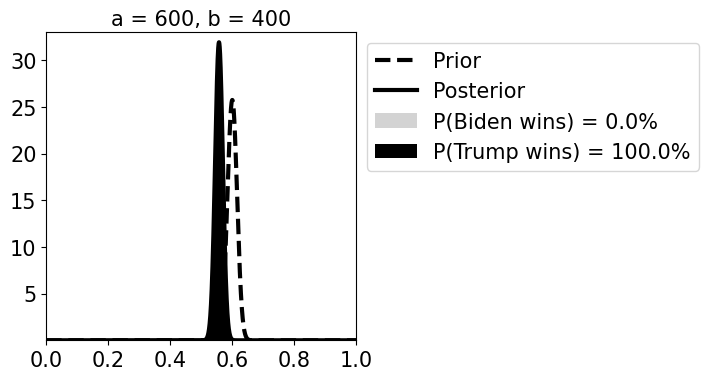

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

font_size = 15
font_size_legend = 15
font_size_ticks = 15

n = 581
trump_votes = 281

a_list = [5,50,4,40,60,6,400,500,600]
b_list = [5,50,6,60,40,4,600,500,400]

x = np.linspace(0, 1.0, 10000)
x1 = np.linspace(0, 0.5, 1000)
x2 = np.linspace(0.5,1, 1000)

for ind in range(len(a_list)):
    # The prior distribution is beta with parameters a and b
    a = a_list[ind]
    b = b_list[ind]
    # The posterior distribution is beta with parameters trump_votes + a and n-trump_votes+b
    p = np.round(100 * beta.cdf(0.5, trump_votes + a, n-trump_votes+b, loc=0, scale=1),1)
    # The probability that Trump wins is obtained by integrating the posterior pdf
    p_c = np.round(100 * (1-beta.cdf(0.5, trump_votes + a, n-trump_votes+b, loc=0, scale=1)),1)
    
    plt.figure(figsize=(4,4))
    plt.plot(x, beta.pdf(x, a, b),ls='dashed',lw=3, color='black',label="Prior")
    plt.plot(x, beta.pdf(x, trump_votes + a, n-trump_votes+b),lw=3, color='black',label="Posterior")
    plt.fill_between(x1, beta.pdf(x1, trump_votes + a, n-trump_votes+b), facecolor='lightgray',label="P(Biden wins) = "+str(p)+'%')
    plt.fill_between(x2, beta.pdf(x2, trump_votes + a, n-trump_votes+b), facecolor='black',label="P(Trump wins) = "+ str(p_c)+'%')
    plt.title("a = " + str(a) + ", b = "+ str(b),fontsize=font_size,pad=5)
    plt.xlim([0,1]) 
    plt.ylim([0.001,33])
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks) 
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1,fontsize=font_size_legend)